#<center>Data Mining Final Project<center> 
---
##<center>Classification of Grapevine Leaves Using CNN<center>

###### <center>July - 2022<center>


<div dir=rtl>
<font face="B Nazanin">

دادگانی که در این پروژه در نظر گرفته شده است دادگان مربوط به شناسایی انواع برگ های درخت انگور است. علاوه بر میوه درخت انگور، برگ های درخت انگور هم قابل استفاده است و بر اساس نوع آن قیمت و کاربرد آن تعیین میشود. جداسازی این برگ ها در مقیاس بزرگ به صورت دستی امکان پذیر نیست. بنابراین سعی میکنیم با دادگانی که داریم عمل دسته بندی برگ ها را به صورت خودکار انجام دهیم.

<div dir=rtl>
<font face="B Nazanin">

مقدمه:
****
محصول اصلی انگور انگوری است که به صورت تازه یا فرآوری شده مصرف می شود. علاوه بر این، برگ انگور سالی یک بار به عنوان محصول جانبی برداشت می شود. گونه های برگ انگور از نظر قیمت و طعم مهم هستند. در نتیجه ما در تلاش هستیم تا طبقه‌بندی مبتنی بر یادگیری عمیق با استفاده از تصاویر برگ‌های انگور انجام می‌شود. به این منظور 500 برگ درخت انگور متعلق به 5 گونه خاص تحت عنوان دیتاست در نظر گرفته شده‌اند.

<div dir=rtl>
<font face="B Nazanin">

شبکه عصبی پیچشی یا CNN چگونه عمل می‌کند؟
****
در یادگیری عمیق، شبکه عصبی کانولوشنال (CNN یا ConvNet) یک کلاس از شبکه عصبی مصنوعی (ANN) است که بیشتر برای تجزیه و تحلیل تصاویر بصری استفاده می شود.
CNN ها نسخه های منظم پرسپترون های چندلایه هستند. پرسپترون های چندلایه معمولاً به معنای شبکه های کاملاً متصل هستند، یعنی هر نورون در یک لایه به تمام نورون های لایه بعدی متصل است. "اتصال کامل" این شبکه ها آنها را مستعد به تناسب بیش از حد داده ها می کند. روش‌های معمولی برای منظم‌سازی یا جلوگیری از تطبیق بیش از حد عبارتند از: پارامترهای جریمه‌کردن در طول تمرین (مانند کاهش وزن) یا کوتاه کردن اتصال (اتصالات نادیده گرفته شده، ترک تحصیل و غیره). و الگوهای با پیچیدگی فزاینده را با استفاده از الگوهای کوچکتر و ساده تری که در فیلترهای آنها نقش بسته است.

<div dir=rtl>
<font face="B Nazanin">

چرا ما از Keras استفاده می‌کنیم؟
****
Keras از بهترین شیوه‌ها برای کاهش بار شناختی پیروی می‌کند، APIهای سازگار و ساده ارائه می‌کند، تعداد اقدامات کاربر مورد نیاز برای موارد استفاده رایج را به حداقل می‌رساند، و بازخورد واضح و عملی را در مورد خطای کاربر ارائه می‌دهد. این امر یادگیری Keras را آسان می کند و استفاده از آن را تسهیل می کند.

#Part_1
Classification of Grapevine Leaves Using CNN (Keras)

In [55]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [6]:
Y_train = []
for i in range(400):
  if i < 80:
    Y_train.append(0)
  elif i < 160:
    Y_train.append(1)
  elif i < 240:
    Y_train.append(2)
  elif i < 320:
    Y_train.append(3)
  elif i < 400:
    Y_train.append(4)
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train), 1)
print("Shape of Y_train: ", Y_train.shape)

Shape of Y_train:  (400, 1)


In [65]:
X_train = []
for i in range(1,81):
  X_train.append(cv2.imread('Ak/Ak ('+str(i)+').png'))
for i in range(1,81):
  X_train.append(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))
for i in range(1,81):
  X_train.append(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))
for i in range(1,81):
  X_train.append(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))
for i in range(1,81):
  X_train.append(cv2.imread('Nazli/Nazli ('+str(i)+').png'))
X_train = np.array(X_train)

print('Train data shape: {}'.format(X_train.shape))

Train data shape: (400, 511, 511, 3)


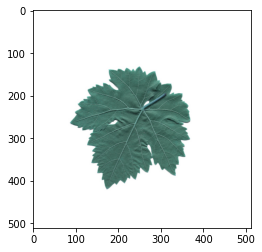

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (511, 511, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
7/7 [==============================] - 116s 15s/step - loss: -270640.7188 - accuracy: 0.2000
Epoch 2/5
7/7 [==============================] - 101s 14s/step - loss: -2865414.7500 - accuracy: 0.2000
Epoch 3/5
7/7 [==============================] - 100s 14s/step - loss: -13435059.0000 - accuracy: 0.2000
Epoch 4/5
7/7 [==============================] - 100s 14s/step - loss: -43794664.0000 - accuracy: 0.2000
Epoch 5/5
7/7 [==============================] - 100s 14s/step - loss: -120244664.0000 - accuracy: 0.2000


In [12]:
Y_test = []
for i in range(100):
  if i < 20:
    Y_test.append(0)
  elif i < 40:
    Y_test.append(1)
  elif i < 60:
    Y_test.append(2)
  elif i < 80:
    Y_test.append(3)
  elif i < 100:
    Y_test.append(4)
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of Y_test: ", Y_test.shape)

Shape of Y_test:  (100, 1)


In [14]:
X_test = []
for i in range(81,101):
  X_test.append(cv2.imread('Ak/Ak ('+str(i)+').png'))
for i in range(81,101):
  X_test.append(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))
for i in range(81,101):
  X_test.append(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))
for i in range(81,101):
  X_test.append(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))
for i in range(81,101):
  X_test.append(cv2.imread('Nazli/Nazli ('+str(i)+').png'))
X_test = np.array(X_test)

print('Test data shape: {}'.format(X_test.shape))

Test data shape: (100, 511, 511, 3)


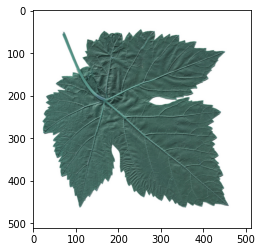

Our model says it is a : Ala_Idris


In [14]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 511, 511, 3))

if(y_pred == 0):
    pred = 'Ak'
elif(y_pred == 1):
    pred = 'Ala_Idris'
elif(y_pred == 2):
    pred = 'Buzgulu'
elif(y_pred == 3):
    pred = 'Dimnit'
elif(y_pred == 4):
    pred = 'Nazli'
    
print("Our model says it is a :", pred)

#Part_2
Classification Report and Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 511, 511, 3))
y_test = Y_test[idx2, :]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Text(42.0, 0.5, 'Truth')

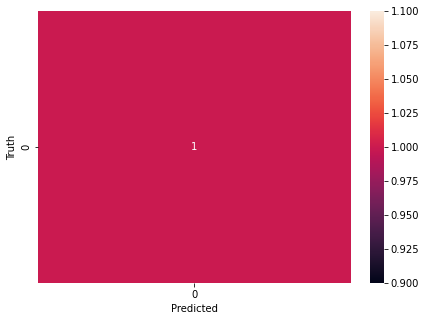

In [17]:
cm = confusion_matrix(y_test, y_pred)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Part_3
Try with other classifiers: KNN, SVM, ...

In [18]:
#KNN
#from sklearn.neighbors import KNeighborsClassifier
#KNN = KNeighborsClassifier(n_neighbors=10)
#KNN.fit(X_train, Y_train)

#SVM
#from sklearn.svm import SVC
#SVM = SVC(kernel = 'linear', random_state = 0)
#SVM.fit(X_train, Y_train)

#Error: ValueError: Found array with dim 4. Estimator expected <= 2.

#Part_4
Data Augmentation

<div dir=rtl>
<font face="B Nazanin">

Data Augmentation به چه معناست؟
****
تقویت داده ها در تجزیه و تحلیل داده ها تکنیک هایی هستند که برای افزایش حجم داده ها با افزودن کپی های کمی تغییر یافته از داده های موجود یا داده های مصنوعی جدید ایجاد شده از داده های موجود استفاده می شوند. این به عنوان یک تنظیم کننده عمل می کند و به کاهش بیش از حد برازش در هنگام آموزش یک مدل یادگیری ماشین کمک می کند.

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(511,3)),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

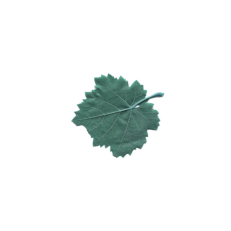

In [24]:
X = np.array(cv2.imread('Ak/Ak (1).png'))
plt.axis('off')
plt.imshow(X)

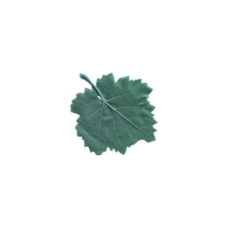

In [25]:
plt.axis('off')
plt.imshow(data_augmentation(X).numpy().astype("uint8"))

<div dir=rtl>
<font face="B Nazanin">

همانطور که مشاهده می‌شود تصویری مشابه تصویری از برگ Ak (1) تولید کرده‌ایم.

#Part_5
Applying CNN on Augmented Data
- Attempt 1

In [26]:
X_train_augmented = []
for i in range(1,81):
  X_train_augmented.append(cv2.imread('Ak/Ak ('+str(i)+').png'))
  X_train_augmented.append(data_augmentation(np.array(cv2.imread('Ak/Ak ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented.append(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))
  X_train_augmented.append(data_augmentation(np.array(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented.append(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))
  X_train_augmented.append(data_augmentation(np.array(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented.append(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))
  X_train_augmented.append(data_augmentation(np.array(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented.append(cv2.imread('Nazli/Nazli ('+str(i)+').png'))
  X_train_augmented.append(data_augmentation(np.array(cv2.imread('Nazli/Nazli ('+str(i)+').png'))).numpy().astype("uint8"))
X_train_augmented = np.array(X_train_augmented)

print('Train data shape: {}'.format(X_train_augmented.shape))

Train data shape: (800, 511, 511, 3)


<div dir=rtl>
<font face="B Nazanin">

همانطور که مشاهده می‌شود،
اندازه‌ی دیتای ما از (400, 511, 511, 3) به (800, 511, 511, 3) افزایش پیدا کرد و دوبرابر شد.

In [27]:
Y_train_augmented = []
for i in range(800):
  if i < 160:
    Y_train_augmented.append(0)
  elif i < 320:
    Y_train_augmented.append(1)
  elif i < 480:
    Y_train_augmented.append(2)
  elif i < 640:
    Y_train_augmented.append(3)
  elif i < 800:
    Y_train_augmented.append(4)
Y_train_augmented = np.array(Y_train_augmented)
Y_train_augmented = Y_train_augmented.reshape(len(Y_train_augmented), 1)
print("Shape of Y_train_augmented: ", Y_train_augmented.shape)

Shape of Y_train_augmented:  (800, 1)


In [28]:
model.fit(X_train_augmented, Y_train_augmented, epochs = 5, batch_size = 64)

Epoch 1/5
13/13 [==============================] - 205s 16s/step - loss: -393628384.0000 - accuracy: 0.2000
Epoch 2/5
13/13 [==============================] - 197s 15s/step - loss: -1295059968.0000 - accuracy: 0.2000
Epoch 3/5
13/13 [==============================] - 205s 16s/step - loss: -3428781824.0000 - accuracy: 0.2000
Epoch 4/5
13/13 [==============================] - 199s 15s/step - loss: -7510822912.0000 - accuracy: 0.2000
Epoch 5/5
13/13 [==============================] - 196s 15s/step - loss: -15236050944.0000 - accuracy: 0.2000


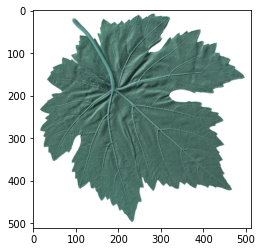

Our model says it is a : Ala_Idris


In [29]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 511, 511, 3))

if(y_pred == 0):
    pred = 'Ak'
elif(y_pred == 1):
    pred = 'Ala_Idris'
elif(y_pred == 2):
    pred = 'Buzgulu'
elif(y_pred == 3):
    pred = 'Dimnit'
elif(y_pred == 4):
    pred = 'Nazli'
    
print("Our model says it is a :", pred)

In [30]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 511, 511, 3))
y_test = Y_test[idx2, :]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Text(42.0, 0.5, 'Truth')

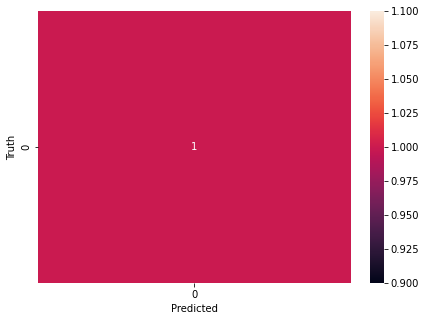

In [31]:
cm = confusion_matrix(y_test, y_pred)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Part_6
Applying CNN on Augmented Data
- Attempt 2

In [32]:
data_augmentation_1 = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(511,3)),
    layers.experimental.preprocessing.RandomRotation(0.8),
    layers.experimental.preprocessing.RandomZoom(0.9),
  ]
)

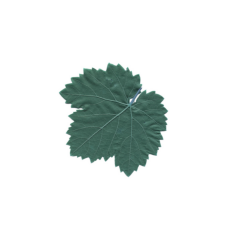

In [44]:
X = np.array(cv2.imread('Ak/Ak (10).png'))
plt.axis('off')
plt.imshow(X)

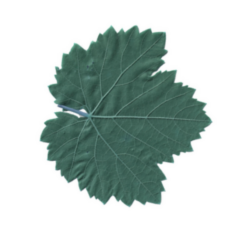

In [49]:
plt.axis('off')
plt.imshow(data_augmentation_1(X).numpy().astype("uint8"))

In [35]:
X_train_augmented_1 = []
for i in range(1,81):
  X_train_augmented_1.append(cv2.imread('Ak/Ak ('+str(i)+').png'))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Ak/Ak ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Ak/Ak ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Ak/Ak ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Ak/Ak ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented_1.append(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented_1.append(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented_1.append(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))).numpy().astype("uint8"))
for i in range(1,81):
  X_train_augmented_1.append(cv2.imread('Nazli/Nazli ('+str(i)+').png'))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Nazli/Nazli ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Nazli/Nazli ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation(np.array(cv2.imread('Nazli/Nazli ('+str(i)+').png'))).numpy().astype("uint8"))
  X_train_augmented_1.append(data_augmentation_1(np.array(cv2.imread('Nazli/Nazli ('+str(i)+').png'))).numpy().astype("uint8"))
X_train_augmented_1 = np.array(X_train_augmented_1)

print('Train data shape: {}'.format(X_train_augmented_1.shape))

Train data shape: (2000, 511, 511, 3)


<div dir=rtl>
<font face="B Nazanin">

اندازه‌ی دیتای آموزش را 5 برابر کرده‌ایم.

In [36]:
Y_train_augmented_1 = []
for i in range(2000):
  if i < 400:
    Y_train_augmented_1.append(0)
  elif i < 800:
    Y_train_augmented_1.append(1)
  elif i < 1200:
    Y_train_augmented_1.append(2)
  elif i < 1600:
    Y_train_augmented_1.append(3)
  elif i < 2000:
    Y_train_augmented_1.append(4)
Y_train_augmented_1 = np.array(Y_train_augmented_1)
Y_train_augmented_1 = Y_train_augmented_1.reshape(len(Y_train_augmented_1), 1)
print("Shape of Y_train_augmented_1: ", Y_train_augmented_1.shape)

Shape of Y_train_augmented_1:  (2000, 1)


In [37]:
model.fit(X_train_augmented_1, Y_train_augmented_1, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 532s 17s/step - loss: -40690413568.0000 - accuracy: 0.2000
Epoch 2/5
32/32 [==============================] - 521s 16s/step - loss: -123440930816.0000 - accuracy: 0.2000
Epoch 3/5
32/32 [==============================] - 523s 16s/step - loss: -301287079936.0000 - accuracy: 0.2000
Epoch 4/5
32/32 [==============================] - 529s 17s/step - loss: -634264092672.0000 - accuracy: 0.2000
Epoch 5/5
32/32 [==============================] - 527s 16s/step - loss: -1186602418176.0000 - accuracy: 0.2000


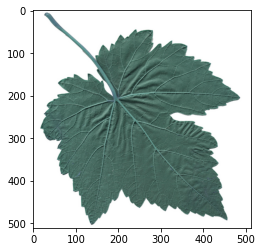

Our model says it is a : Ala_Idris


In [38]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 511, 511, 3))

if(y_pred == 0):
    pred = 'Ak'
elif(y_pred == 1):
    pred = 'Ala_Idris'
elif(y_pred == 2):
    pred = 'Buzgulu'
elif(y_pred == 3):
    pred = 'Dimnit'
elif(y_pred == 4):
    pred = 'Nazli'
    
print("Our model says it is a :", pred)

In [39]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 511, 511, 3))
y_test = Y_test[idx2, :]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Text(42.0, 0.5, 'Truth')

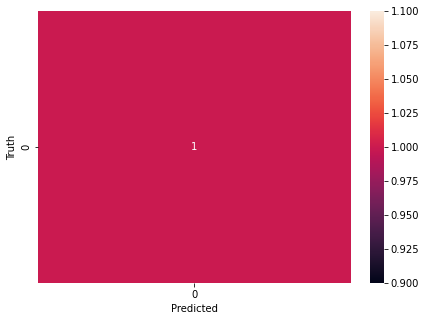

In [40]:
cm = confusion_matrix(y_test, y_pred)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Part_7
Convolutional Autoencoder For Image Denoising

In [51]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [52]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 511, 511, 3))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(511, 511))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(511, 511))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [82]:
input = layers.Input(shape=(511, 511, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 511, 511, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 511, 511, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 256, 256, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 256, 256, 32)     9248

In [87]:
# Normalize and reshape the data
X_train_4 = preprocess(X_train)
X_test_4 = preprocess(X_test)

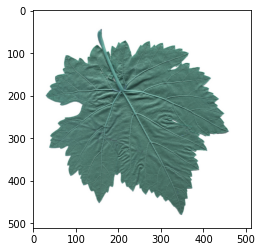

In [88]:
idx = random.randint(0, len(X_train_4))
plt.imshow(X_train_4[idx, :])
plt.show()

#Part_8
10-fold cross validation

10-fold cross validation would perform the fitting procedure a total of ten times, with each fit being performed on a training set consisting of 90% of the total training set selected at random, with the remaining 10% used as a hold out set for validation.

In [12]:
from sklearn.model_selection import train_test_split

<div dir=rtl>
<font face="B Nazanin">

کد زیر دیتای آموزش و تست را به صورت رندوم جدا کرده و لیبل‌گذاری می‌کند و اگر ده بار کد زیر را اجرا کرده و مدل را با آن آموزش دهیم می‌توانیم به ارزیابی مورد نظر برسیم.

In [50]:
X_train = []
X_test = []
Y_train = []
Y_test = []

numbers = list(range(1,101))

XXX,YYY = train_test_split(numbers, test_size=0.1, random_state=42)

for i in range(1,101):
  if i in XXX:
    X_train.append(cv2.imread('Ak/Ak ('+str(i)+').png'))
    Y_train.append(i)
    Y_train.append(0)
  elif i in YYY:
    X_test.append(cv2.imread('Ak/Ak ('+str(i)+').png'))
    Y_test.append(i)
    Y_test.append(0)

for i in range(1,101):
  if i in XXX:
    X_train.append(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))
    Y_train.append(i)
    Y_train.append(1)
  elif i in YYY:
    X_test.append(cv2.imread('Ala_Idris/Ala_Idris ('+str(i)+').png'))
    Y_test.append(i)
    Y_test.append(1)

for i in range(1,101):
  if i in XXX:
    X_train.append(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))
    Y_train.append(i)
    Y_train.append(2)
  elif i in YYY:
    X_test.append(cv2.imread('Buzgulu/Buzgulu ('+str(i)+').png'))
    Y_test.append(i)
    Y_test.append(2)

for i in range(1,101):
  if i in XXX:
    X_train.append(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))
    Y_train.append(i)
    Y_train.append(3)
  elif i in YYY:
    X_test.append(cv2.imread('Dimnit/Dimnit ('+str(i)+').png'))
    Y_test.append(i)
    Y_test.append(3)

for i in range(1,101):
  if i in XXX:
    X_train.append(cv2.imread('Nazli/Nazli ('+str(i)+').png'))
    Y_train.append(i)
    Y_train.append(4)
  elif i in YYY:
    X_test.append(cv2.imread('Nazli/Nazli ('+str(i)+').png'))
    Y_test.append(i)
    Y_test.append(4)

def to_matrix(l, n):
  return [l[i:i+n] for i in range(0, len(l), n)]

Y_train = to_matrix(Y_train,2)
Y_test = to_matrix(Y_test,2)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print('Train data shape: {}'.format(X_train.shape))
print('Train data shape: {}'.format(X_test.shape))
print("Shape of X_test: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)

Train data shape: (450, 511, 511, 3)
Train data shape: (50, 511, 511, 3)
Shape of X_test:  (450, 2)
Shape of Y_test:  (50, 2)
